In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from collections import defaultdict
from bokeh.palettes import Category20b

In [4]:
pca_ld03 = pd.read_csv('PCA_ld03_eigenvec.txt', sep=' ', header=None)
pca_ld08 = pd.read_csv('PCA_ld08_eigenvec.txt', sep=' ', header=None)

In [7]:
kgp = pd.read_csv('1000GenomesPops.txt', sep='\t')
nat = pd.read_csv('NAT.txt', sep='\t', header=None).drop(columns=[1])

populations = ['YRI', 'CEU', 'PEL', 'PUR', 'CLM', 'MXL', 'NAT'] 
pop_kgp = kgp.loc[kgp['SubPopulation'].isin(populations)]
pop_kgp =pop_kgp.drop(columns=['Family.ID', 'Population.Description', 'Gender'])

nat.rename(columns={0: "Sample"}, inplace=True)
nat = nat.assign(SubPopulation = 'NAT', Population='NAT')

target_pop = pd.concat([pop_kgp, nat], ignore_index=True)

In [8]:
popul_by_ind = defaultdict(int)
for tupla in target_pop.itertuples():
    sample = tupla[1]
    subpop = tupla[2]
    popul = tupla[3]
    popul_by_ind[sample] = subpop 
    
pop_by_continent = {'EUR':['CEU'], 'AMR':['CLM', 'MXL',
                                          'PEL', 'PUR'],
                   'AFR':['YRI'],'NAT':['NAT']}
continents = list(pop_by_continent.keys())

In [9]:
individuals = pca_ld03[0]
individuals

0         CHMI_CHMI3_WGS2
1       LP6005441-DNA_F08
2               HGDP00843
3               HGDP00392
4       LP6005441-DNA_H03
              ...        
4146              HG01767
4147              HG01768
4148              HG01785
4149              HG01786
4150              HG02219
Name: 0, Length: 4151, dtype: object

In [10]:
idx_pops_members = defaultdict(list)
for idx, individual in enumerate(individuals):
    idx_pops_members[popul_by_ind[individual]].append(idx)

In [20]:
pca_ld03 = pca_ld03[pca_ld03[1].isin(target_pop['Sample'])]

In [22]:
pca_ld3 = pca_ld03.drop(columns=[0,1])
pca_ld3 = pca_ld3.to_numpy(dtype='float32')

In [13]:
color_dict = {}
for i, cont in enumerate(continents): 
    for j, pop in enumerate(pop_by_continent[cont]):
        color_dict[pop] = Category20b[20][4*i+j%4]
color_dict

{'CEU': '#393b79',
 'CLM': '#637939',
 'MXL': '#8ca252',
 'PEL': '#b5cf6b',
 'PUR': '#cedb9c',
 'YRI': '#8c6d31',
 'NAT': '#843c39'}

In [23]:
np.shape(pca_ld3)

(883, 20)

In [24]:
umap_proj = umap.UMAP(n_components=19, n_neighbors=10,
                      min_dist=0.001,
                    verbose=True).fit(pca_ld3[:, :19])

UMAP(min_dist=0.001, n_components=19, n_neighbors=10, verbose=True)
Fri Sep 22 16:52:41 2023 Construct fuzzy simplicial set
Fri Sep 22 16:52:41 2023 Finding Nearest Neighbors
Fri Sep 22 16:52:41 2023 Finished Nearest Neighbor Search
Fri Sep 22 16:52:41 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Fri Sep 22 16:52:45 2023 Finished embedding


In [27]:
np.shape(umap_proj)

()

In [18]:
plt.figure(figsize=(10,10))
# Use the PCA projection
dset = umap_proj.embedding_

for cont in continents: 
    for pop in pop_by_continent[cont]:
        temp_proj = dset[idx_pops_members[pop]]
        plt.plot(temp_proj[:,0], temp_proj[:,1], '.', color = color_dict[pop])

plt.xlabel("UMAP1")
plt.ylabel("UMAP2")

IndexError: index 1451 is out of bounds for axis 0 with size 883

<Figure size 1000x1000 with 0 Axes>

In [164]:
pip install adjustText

Note: you may need to restart the kernel to use updated packages.


In [162]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

# parameters for plots
point_alpha = 0.15 # alpha parameter for points
fsize = 20 # font size for labels
lwidth = 0.5 # line width for labels

NameError: name 'adjust_text' is not defined

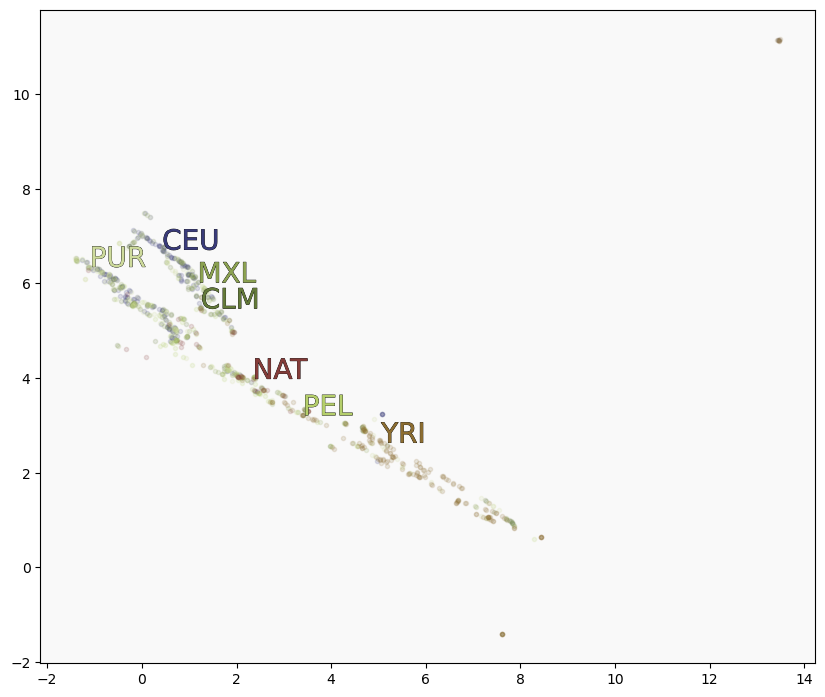

In [163]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, aspect=1)

ax.set_facecolor('#f9f9f9')

dset = umap_proj.embedding_

texts = []

for cont in continents: 
    for pop in pop_by_continent[cont]:
        temp_proj = dset[idx_pops_members[pop]]
        plt.plot(temp_proj[:,0], temp_proj[:,1], '.', color = color_dict[pop], alpha=point_alpha)
        
        for i, temp_proj_sub in enumerate(temp_proj):
            if i==temp_proj.shape[0]-1:
                texts.append(ax.text(temp_proj_sub[0], temp_proj_sub[1], pop,
                                     fontdict={"color": color_dict[pop], "size": fsize},
                                     path_effects=[PathEffects.withStroke(linewidth=lwidth, foreground="black")]))

adjust_text(texts)

plt.style.use(['default'])
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()